In [1]:
import os
import sys
from pathlib import Path
path = str(Path(os.getcwd()))
# sys.path.insert(1, path+'/amazon-braket-community-detection/src')

In [4]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from geopy.distance import geodesic
import networkx as nx

df = pd.read_csv(path+'/database/Peninsula_pp.csv', delimiter=',', skiprows=0)
df

,Number,name,capacity(MW),latitude,longitude,primary_fuel,estimated_generation_gwh,Estimated cost for 1 year
0,1,Bukit Palong Solar Power Plant,3.0,2.5823,101.8313,Solar,2.419183,2.935532e+05
1,2,Gebeng Solar Power Plant,10.0,3.9924,103.3682,Solar,8.063943,9.785106e+05
2,3,Gemas Solar Power Plant,10.2,2.5956,102.6216,Solar,8.225222,9.980809e+05
3,4,Hijau Solar Power Plant,8.0,2.3409,102.2168,Solar,6.451155,7.828085e+05
4,5,Jasin,50.0,2.3400,102.3500,Solar,40.319716,4.892553e+06
5,6,Kuala Langat,50.0,2.7450,101.5600,Solar,40.319716,4.892553e+06
6,7,Kuala Lumpur Airport Solar Power Plant,19.0,2.7791,101.7144,Solar,15.321492,1.859170e+06
7,8,Kuala Perlis Solar Power Plant,6.0,6.4105,100.1378,Solar,4.838366,5.871064e+05
8,9,Kuala Sawah Solar Power Plant,5.3,2.6355,101.9404,Solar,4.273890,5.186106e+05
9,10,Merchang,50.0,4.9340,103.3360,Solar,40.319716,4.892553e+06


In [ ]:
ind = df['Number']
name = df['name']
lat = df['latitude']
long = df['longitude']
capacity = df['capacity(MW)']
penetration = df['Estimated cost for 1 year']

In [6]:
locations = {ind: (lat, long) for ind, lat, long in zip(ind, lat, long)}
locations

{1: (2.5823, 101.8313),
 2: (3.9924, 103.3682),
 3: (2.5956, 102.6216),
 4: (2.3409, 102.2168),
 5: (2.34, 102.35),
 6: (2.745, 101.56),
 7: (2.7791, 101.7144),
 8: (6.4105, 100.1378),
 9: (2.6355, 101.9404),
 10: (4.934, 103.336),
 12: (2.8357, 101.8488),
 13: (1.4721, 103.3925),
 14: (2.715, 101.75)}

In [7]:
(len(locations.keys()))

13

In [ ]:

# noconsumers = 10
# c_energy = np.random.default_rng().normal(loc=np.average(capacity), scale=np.std(capacity)/2, size=noconsumers)
# # c_energy = np.random.default_rng().integers(low=min(capacity), high=max(capacity), size=10)
# c_energy

In [8]:
def calculate_distance_mgpp(mglat, mglong, pplat, pplong):    
    distance_matrix = np.zeros(len(pplat))
    for i in range(len(pplat)):
        distance_matrix[i] = geodesic((mglat, mglong), (pplat[i], pplong[i])).km
    return distance_matrix


In [9]:
def calculate_distance_mgmg(mglat, mglong):    
    distance_matrix = np.zeros((len(mglat), len(mglat)))
    for i in range(len(mglat)):
        for j in range(len(mglat)):
            if i < j:
                distance_matrix[i][j] = geodesic((mglat[i], mglong[i]), (mglat[j], mglong[j])).km
    return distance_matrix

In [10]:
# def create_transmission_network(locations, distance_matrix, threshold=45):
#     G = nx.Graph()
#     for i, label_i in enumerate(locations.keys()):
#         for j, label_j in enumerate(locations.keys()):
#             if i < j:
#                 if distance_matrix[i][j] < threshold: # Only add edge if distance is below threshold
#                     G.add_edge(label_i, label_j)
#     return G

In [11]:
print(enumerate(locations.keys()))

In [12]:
# distance_matrix = calculate_distance_matrix(lat, long)

# # Create Graph Based on Distance Threshold
# G = create_transmission_network(locations, distance_matrix, threshold=45)

# # Visualize Graph
# fig, ax = plt.subplots()
# pos = {label: (lon, lat) for label, (lat, lon) in locations.items()}
# nx.draw(G, pos, ax=ax, node_size=100, node_color='blue')
# # nx.draw(G, pos, ax=ax, node_size=800, with_labels=True)
# # with_labels=True, node_color='lightblue', node_size=800)
# plt.title("Solar Panel Proximity Graph")
# plt.show()

In [13]:
# total_nodes = len(G.nodes(data=True))
# total_edges = len(G.edges(data=True))

In [14]:
import scipy.sparse as sp
from networkx.algorithms import community

### create QUBO matrix
# define the distance matrix
num_powerplants = (len(locations.keys())) ## number of solar power plants
pplat, pplong = zip(*locations.values())

In [25]:
# generate choices for microgrid locations
num_microgrids = 20 ## number of microgrids
random = np.random.default_rng(seed=45)
random_lat = random.uniform(min(lat), max(lat), size=4*num_microgrids)
lat_choices = random.choice(random_lat, size=num_microgrids, replace=False)

random_long = random.uniform(min(long), max(long), size=4*num_microgrids)
long_choices = random.choice(random_long, size=num_microgrids, replace=False)

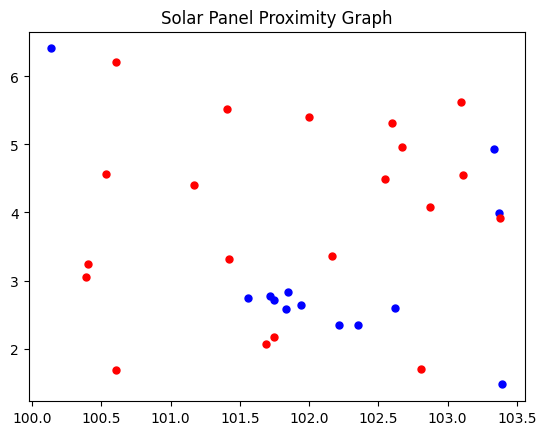

In [26]:
# Visualize Graph
fig, ax = plt.subplots()
ax.plot(long, lat, 'o', markersize=5, color='blue')
ax.plot(long_choices, lat_choices, 'o', markersize=5, color='red')
plt.title("Solar Panel Proximity Graph")
plt.show()

In [22]:
mgpp_distance = np.zeros(num_microgrids)
for i in range(num_microgrids):
    mgpp_distance[i] = np.sum(calculate_distance_mgpp(lat_choices[i], long_choices[i],pplat, pplong))
mgpp_distance

array([5235.16512456, 2071.40522355, 3742.54389198, 1858.82005563,
       2597.5958179 , 3152.81997222, 3126.345144  , 3100.45011568,
       3391.49418581, 3861.31079696, 3381.18465818, 3142.1802956 ,
       1929.91437721, 2540.72542745, 4120.61353282, 2090.03357763,
       3775.08086024, 4269.34581697, 2876.54170764, 2772.37989782])

In [23]:
mgmg_distance = calculate_distance_mgmg(lat_choices, long_choices)
mgmg_distance

array([[  0.        , 474.43897796, 181.99217627, 359.54143009,
        344.81084608, 329.48510906, 209.29347207, 333.24362739,
        500.39262117, 178.29967535, 267.10082372, 351.02779404,
        464.90888112, 555.70839111, 118.06875953, 333.10256412,
        242.1801934 , 283.67409149, 287.33073916, 398.55729921],
       [  0.        ,   0.        , 305.40596583, 153.14390304,
        259.23248065, 193.15665065, 265.57861831, 316.93520999,
        127.4316449 , 370.88002075, 338.71343058, 180.89517344,
         13.39798003, 131.26135226, 382.70039584, 141.53567067,
        374.17284058, 423.3464216 , 285.37369271, 278.03949554],
       [  0.        ,   0.        ,   0.        , 224.92346371,
        265.4290402 , 147.60729628,  73.03745953, 286.00607327,
        318.67416493, 186.62707943, 240.8046026 , 169.15323768,
        297.7784694 , 405.7197211 , 142.54271612, 170.21820882,
        243.9339835 , 307.15563205, 223.8517294 , 323.74109839],
       [  0.        ,   0.        ,  

In [27]:
costCoeff = 10000
mgpp_cost = mgpp_distance * costCoeff
mgmg_cost = mgmg_distance * costCoeff

battery_cost = 38000  # Example fixed cost for battery and inverter installation
land_cost = 13000  # Example fixed cost for land acquisition
fixedCost = battery_cost + land_cost

In [28]:
def add_count_constraint(K, delta, N):
    """
    Adds a count constraint penalty to QUBO: (sum x_i - K)^2
    Args:
        Q: dict of QUBO terms (modified in-place)
        K: number of locations to select
        delta: penalty strength
        N: total number of candidate locations
    """
    Q = np.zeros((N, N))
    for i in range(N):
        Q[(i, i)] += delta * (1 - 2 * K)
        for j in range(i + 1, N):
            Q[(i, j)] += 2 * delta
    return Q


In [37]:
## budget constraint
panaltyTerm = add_count_constraint(5, 100000, num_microgrids)
panaltyTerm


array([[-900000.,  200000.,  200000.,  200000.,  200000.,  200000.,
         200000.,  200000.,  200000.,  200000.,  200000.,  200000.,
         200000.,  200000.,  200000.,  200000.,  200000.,  200000.,
         200000.,  200000.],
       [      0., -900000.,  200000.,  200000.,  200000.,  200000.,
         200000.,  200000.,  200000.,  200000.,  200000.,  200000.,
         200000.,  200000.,  200000.,  200000.,  200000.,  200000.,
         200000.,  200000.],
       [      0.,       0., -900000.,  200000.,  200000.,  200000.,
         200000.,  200000.,  200000.,  200000.,  200000.,  200000.,
         200000.,  200000.,  200000.,  200000.,  200000.,  200000.,
         200000.,  200000.],
       [      0.,       0.,       0., -900000.,  200000.,  200000.,
         200000.,  200000.,  200000.,  200000.,  200000.,  200000.,
         200000.,  200000.,  200000.,  200000.,  200000.,  200000.,
         200000.,  200000.],
       [      0.,       0.,       0.,       0., -900000.,  200000.,


In [46]:
mgpp_cost

array([52351651.24560628, 20714052.23551929, 37425438.9197676 ,
       18588200.55632364, 25975958.17900284, 31528199.72218921,
       31263451.44001994, 31004501.1568433 , 33914941.85810149,
       38613107.96960946, 33811846.58178946, 31421802.95603348,
       19299143.77210243, 25407254.27448013, 41206135.32822228,
       20900335.77629681, 37750808.60239761, 42693458.16965186,
       28765417.07635994, 27723798.97824029])

In [57]:
np.average(np.array(penetration))

1742501.6365846156

In [58]:
sum(np.array(penetration))

22652521.2756

In [61]:
### QUBO matrix
term1 = (fixedCost*np.ones((1, num_microgrids))) - (sum(np.array(penetration)))*np.ones((1, num_microgrids)) + mgpp_cost
linearTerm = np.zeros((num_microgrids, num_microgrids))
for i in range(num_microgrids):
    linearTerm[i,i] = term1[0,i]
quandTerm = mgmg_cost

qubo_matrix = linearTerm + quandTerm + panaltyTerm

In [62]:
qubo_matrix

array([[28850129.97000628,  4944389.77961912,  2019921.76266059,
         3795414.30091116,  3648108.46077349,  3494851.09063751,
         2292934.72065946,  3532436.27390516,  5203926.21166013,
         1982996.75349264,  2871008.23723226,  3710277.94044724,
         4849088.81118743,  5757083.91114101,  1380687.59528399,
         3531025.64118459,  2621801.93397259,  3036740.91485226,
         3073307.39159241,  4185572.99209836],
       [       0.        , -2787469.04008071,  3254059.65829595,
         1731439.03037949,  2792324.80654259,  2131566.50651133,
         2855786.18309045,  3369352.09991853,  1474316.4489769 ,
         3908800.20747158,  3587134.30582728,  2008951.73439954,
          333979.80033436,  1512613.52258039,  4027003.95837261,
         1615356.70666206,  3941728.40582065,  4433464.21601129,
         3053736.92708567,  2980394.95535929],
       [       0.        ,        0.        , 13923917.64416759,
         2449234.63706643,  2854290.4020083 ,  1676072.962803

In [63]:
from autoqubo import SamplingCompiler, Utils
import timeit

In [64]:
start = timeit.default_timer()

solutions, energy_values = Utils.solve(qubo_matrix)

stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  0.03355575000000499


In [65]:
for s, e in zip(solutions, energy_values):
    print(f"x={s}, energy={e}")

x=[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], energy=-8238383.8220144035


In [66]:
sum(solutions[0])

3

In [67]:
from gurobi_optimods.qubo import solve_qubo


start = timeit.default_timer()
 
result = solve_qubo(qubo_matrix)

stop = timeit.default_timer()
print('Time: ', stop - start)

New QUBO solution found with objective 0.0
New QUBO solution found with objective -8238383.8220144035


Time:  0.13993525000000773


In [68]:
result

QuboResult(solution=array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.]), objective_value=-8238383.8220144035)

In [69]:
sum(result.solution)

3.0

In [70]:
result.solution == solutions[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## qiskit

In [ ]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np
from scipy.optimize import minimize
from collections import defaultdict
from typing import Sequence
 
 
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import QAOAAnsatz
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler


In [ ]:
from qiskit import QuantumCircuit
qiskit_circuit = QuantumCircuit(num_microgrids + 1)


In [ ]:
sum([qubo_matrix[0][m] for m in range(num_microgrids)])

In [ ]:
def build_qubo_paulis(qubo) -> list[tuple[str, float]]:
    pauli_list = []
    for i in range(num_microgrids):
        for j in range(num_microgrids):
            if i == j:
                pauli_list.append(("Z", [i], (-1)*sum([qubo[i][j]+qubo[i][i] for j in range(num_microgrids)])))
            else:
                pauli_list.append(("ZZ", [i, j], qubo[i][j]))
    return pauli_list
    # for edge in list(graph.edge_list()):
    #     weight = graph.get_edge_data(edge[0], edge[1])
    #     pauli_list.append(("ZZ", [edge[0], edge[1]], weight))
    # return pauli_list
 
qubo_paulis = build_qubo_paulis(qubo_matrix)
cost_hamiltonian = SparsePauliOp.from_sparse_list(qubo_paulis, num_microgrids)
print("Cost Function Hamiltonian:", cost_hamiltonian)

In [ ]:
circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)
circuit.measure_all()
 
circuit.draw("mpl")

In [ ]:
# decomposed = circuit.decompose().decompose().decompose()
# from qiskit.qasm3 import dumps

# decomposed_qasm_string = dumps(decomposed)

In [ ]:
# import qbraid 
# provider = qbraid.QbraidProvider()
# aws_device_id = "aws_sv1"
# device = provider.get_device(aws_device_id)
# device

In [ ]:
qiskit_sim = AerSimulator()

In [ ]:
estimator = Estimator(qiskit_sim)

In [ ]:
# service = QiskitRuntimeService()
backend = qiskit_sim
print(backend)
 
# Create pass manager for transpilation
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
 
candidate_circuit = pm.run(circuit)
candidate_circuit.draw("mpl", fold=False, idle_wires=False)

In [ ]:
initial_gamma = np.pi
initial_beta = np.pi / 2
init_params = [initial_beta, initial_beta, initial_gamma, initial_gamma]

In [ ]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):
    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)
 
    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])
 
    results = job.result()[0]
    cost = results.data.evs
 
    objective_func_vals.append(cost)
 
    return cost

In [ ]:
objective_func_vals = []  # Global variable
with Session(backend=backend) as session:
    # If using qiskit-ibm-runtime<0.24.0, change `mode=` to `session=`
    estimator = Estimator(mode=session)
    estimator.options.default_shots = 50000
 
    # Set simple error suppression/mitigation options
    estimator.options.dynamical_decoupling.enable = True
    estimator.options.dynamical_decoupling.sequence_type = "XY4"
    estimator.options.twirling.enable_gates = True
    estimator.options.twirling.num_randomizations = "auto"
 
    result = minimize(
        cost_func_estimator,
        init_params,
        args=(candidate_circuit, cost_hamiltonian, estimator),
        method="COBYLA",
        # method="dogleg",
        tol=1e-2
    )
    print(result)

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(objective_func_vals)
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()

In [ ]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)

optimized_circuit.draw("mpl", fold=False, idle_wires=False)

In [ ]:
job = qiskit_sim.run(optimized_circuit, shots=int(1e4))
job.result()

In [ ]:
{bin(int(k, 16)): v for k, v in job.result().results[0].data.counts.items()}

In [ ]:
int("0x3", 16)

In [ ]:
# #If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
# sampler = Sampler(mode=backend)
# sampler.options.default_shots = 10000

# # Set simple error suppression/mitigation options
# sampler.options.dynamical_decoupling.enable = True
# sampler.options.dynamical_decoupling.sequence_type = "XY4"
# sampler.options.twirling.enable_gates = True
# sampler.options.twirling.num_randomizations = "auto"

job = qiskit_sim.run(optimized_circuit, shots=int(1e4))
# counts_int = job.result().data.get_int_counts()
# counts_bin = job.result()
# print(counts_bin.data)
# shots = sum(counts_int.values())
# final_distribution_int = {key: val / shots for key, val in counts_int.items()}
# final_distribution_bin = {key: val / shots for key, val in counts_bin.items()}
# print(final_distribution_int)

In [ ]:
# qasm_3 = transpile(circuit.decompose(), 'qasm3')
# print(qasm_3)

braket_job = device.run(decomposed_qasm_string, shots=10)
braket_job.status()